# Explore the Data

In [303]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE, Isomap
import sklearn.manifold as manifold
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

## Setup the dataframe

In [304]:
df_data = pd.read_csv("MammalsDataSet/MammalsDataset2020.csv", header=None)

with open("MammalsDataSet/AnimalNames.txt") as f:
    animal_names = f.readlines()
    
animal_names = [a.strip() for a in animal_names]

with open("MammalsDataSet/PropertyNames.csv") as f:
    property_names = f.read()
    
property_names = property_names.split("\n")[:-1]


df_data = df_data.rename(index=dict(enumerate(animal_names)), columns=dict(enumerate(property_names)))
df_data = df_data/100

In [305]:
df_data

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,plains,forest,fields,jungle,mountains,ocean,ground,water,tree,cave
antelope,0.0000,0.0000,0.0000,0.0000,0.1234,0.0000,0.0000,0.0000,0.1611,0.0919,...,0.5479,0.0494,0.4097,0.0000,0.2232,0.0000,0.5714,0.0000,0.0000,0.0123
grizzly bear,0.3925,0.0139,0.0000,0.7414,0.0375,0.0000,0.0000,0.0000,0.0125,0.0000,...,0.0000,0.7740,0.1000,0.0250,0.4385,0.0000,0.4777,0.0764,0.0979,0.5314
killer whale,0.8340,0.6479,0.0000,0.0000,0.0125,0.0000,0.0000,0.0000,0.6849,0.3269,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.8828,0.0000,0.7949,0.0000,0.0000
beaver,0.1938,0.0000,0.0000,0.8781,0.0750,0.0000,0.0000,0.0000,0.0000,0.0750,...,0.0000,0.1906,0.1562,0.0000,0.0000,0.0000,0.3125,0.6562,0.0000,0.0000
dalmatian,0.6958,0.7333,0.0000,0.0639,0.0000,0.0000,0.0000,0.0000,0.3708,1.0000,...,0.0000,0.0000,0.0125,0.0000,0.0000,0.0000,0.4139,0.0125,0.0625,0.0000
persian cat,0.1938,0.5009,0.2944,0.0898,0.3819,0.0000,0.0000,0.0000,0.1793,0.0625,...,0.1055,0.0898,0.0977,0.0625,0.0625,0.0000,0.4750,0.0125,0.0264,0.0000
horse,0.4490,0.4291,0.0444,0.6941,0.3594,0.0000,0.0000,0.0000,0.2229,0.1580,...,0.5254,0.1076,0.7014,0.0333,0.1622,0.0000,0.5652,0.0222,0.0000,0.0000
german shepherd,0.4354,0.1588,0.0500,0.5416,0.2682,0.0312,0.0250,0.0038,0.4878,0.1159,...,0.2133,0.1789,0.1250,0.0000,0.1125,0.0000,0.7261,0.0375,0.0000,0.0250
blue whale,0.1292,0.0438,0.6708,0.0750,0.2560,0.0000,0.0000,0.0000,0.1531,0.2375,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.7411,0.0000,0.7661,0.0000,0.0000
siamese cat,0.5621,0.2351,0.1222,0.3269,0.3813,0.0000,0.0000,0.0000,0.3583,0.0694,...,0.0778,0.0444,0.1000,0.0222,0.0556,0.0000,0.6042,0.0222,0.1000,0.0111


In [306]:
feature_array = df_data.to_numpy()
animal_array = np.diag(np.ones((50)))
data_array = np.concatenate((animal_array, feature_array), axis=1)
data_array_torch = torch.tensor(data_array)

## Clustering Analysis

### Cluster the Data Affinity Propogation

In [307]:
affinity_clustering = AffinityPropagation(random_state=1).fit(feature_array)
affinity_clustering.labels_

array([6, 3, 0, 4, 5, 5, 6, 5, 0, 5, 4, 4, 3, 2, 3, 6, 1, 0, 2, 1, 6, 3,
       6, 0, 1, 4, 4, 2, 4, 4, 6, 3, 5, 4, 3, 0, 6, 6, 6, 6, 3, 6, 3, 4,
       3, 5, 0, 4, 6, 0])

### Cluster the Data Agglomerative Clustering

In [308]:
agglo_clustering = AgglomerativeClustering(n_clusters=7).fit(feature_array)
agglo_clustering.labels_

array([1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 4, 4, 5, 6, 5, 1, 3, 2, 6, 3, 1, 5,
       1, 2, 3, 4, 4, 6, 4, 3, 1, 5, 0, 4, 5, 2, 1, 1, 0, 1, 5, 1, 5, 4,
       0, 0, 2, 4, 1, 2])

### Similarity Matrix

In [309]:
def cos_sim(a, b): 
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

def inverse_distance(a,b):
    distance = np.linalg.norm(b-a)
    return 1/distance if distance != 0 else np.Inf

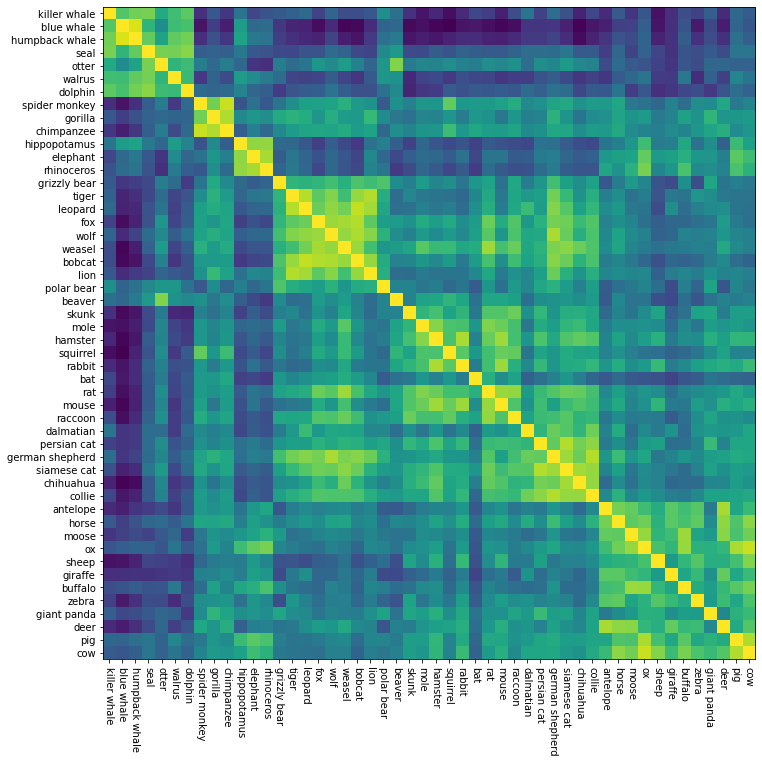

In [310]:
def compute_similarity_matrix(feature_array, similarity_measure="cosine"):
    
    num_animals = feature_array.shape[0]
    
    similarity_matrix = np.zeros((num_animals, num_animals))

    for i in range(num_animals):

        animal_rep = feature_array[i,:]

        for j in range(num_animals):

            comparator = feature_array[j,:]
            
            if similarity_measure == "cosine":
                sim = cos_sim(animal_rep, comparator)
            elif similarity_measure == "inverse_euclid":
                sim = inverse_distance(animal_rep, comparator)
            else:
                raise Exception("Similarity measure " + similarity_measure + " not implemented")

            similarity_matrix[i,j] = sim
            
    return similarity_matrix


def visualize_similarity_matrix(cluster_labels, feature_array, animal_names, similarity_measure="cosine", save_file=None):

    indexed_cluster_labels = sorted([(i,cluster_labels[i],animal_names[i]) for i in range(len(cluster_labels))], key=lambda x: x[1])
    
    clustered_array = np.zeros(feature_array.shape)
    sorted_animal_names = []

    for j in range(len(indexed_cluster_labels)):

        i, _, name = indexed_cluster_labels[j]
        clustered_array[j,:] = feature_array[i, :]
        sorted_animal_names.append(name)

    similarity_matrix = compute_similarity_matrix(clustered_array, similarity_measure=similarity_measure)

    fig, ax = plt.subplots()
    ax.imshow(similarity_matrix)
    ax.set_xticks(range(len(sorted_animal_names)))
    ax.set_yticks(range(len(sorted_animal_names)))
    ax.set_xticklabels(sorted_animal_names, rotation=270)
    ax.set_yticklabels(sorted_animal_names)
    fig.set_size_inches(12,12)
    
    if not (save_file is None):
        plt.savefig(save_file)
    
    return similarity_matrix
    
    
data_similarity_matrix = visualize_similarity_matrix(affinity_clustering.labels_,
                                                     feature_array,
                                                     animal_names,
                                                     save_file="data_similarity_matrix.png")

### PCA

In [311]:
features_PCA = PCA(n_components=15).fit_transform(feature_array)
features_PCA.shape

(50, 15)

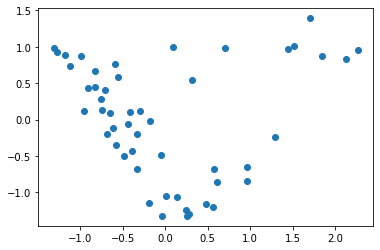

In [312]:
x = features_PCA[:,0]
y = features_PCA[:,1]

plt.scatter(x,y)

### TSNE

In [313]:
tsne_reduced = manifold.TSNE(n_components=2,
                    perplexity=7.5,
                    early_exaggeration=12,
                    random_state=1).fit_transform(feature_array)
# feature_array_reduced

Text(0.5, 1.0, 'T-SNE visualization of the dataset')

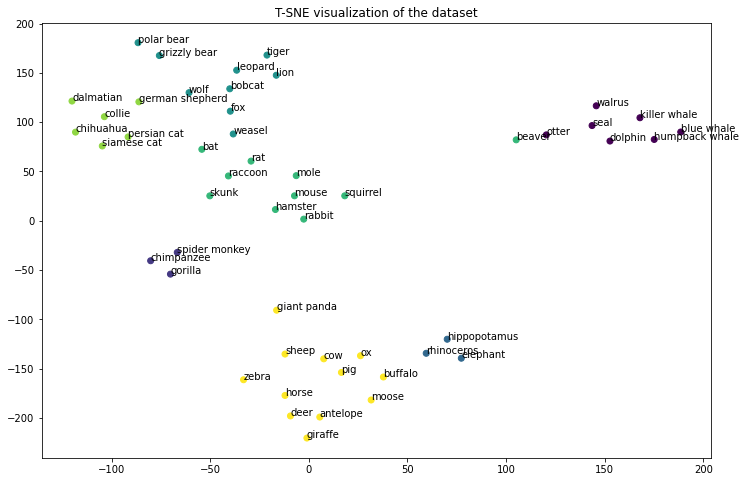

In [314]:
x = tsne_reduced[:,0]
y = tsne_reduced[:,1]
# z = tsne_reduced[:,2]

fig, ax = plt.subplots()
ax.scatter(x,y,c=affinity_clustering.labels_)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=x,ys=y,zs=z,c=affinity_clustering.labels_)

fig.set_size_inches(12, 8)

for i, animal in enumerate(animal_names):
    x_coor = x[i]
    y_coor = y[i]
#     z_coor = z[i]
    ax.annotate(animal, (x_coor, y_coor))
    
plt.title("T-SNE visualization of the dataset")

In [315]:
data_array_torch

tensor([[1.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0123],
        [0.0000, 1.0000, 0.0000,  ..., 0.0764, 0.0979, 0.5314],
        [0.0000, 0.0000, 1.0000,  ..., 0.7949, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0208, 0.3341, 0.0727],
        [0.0000, 0.0000, 0.0000,  ..., 0.0055, 0.0000, 0.0032],
        [0.0000, 0.0000, 0.0000,  ..., 0.7140, 0.0000, 0.0000]],
       dtype=torch.float64)

## Design Neural Net

In [316]:
hidden_layer_size = 50

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Input layer linear
        self.input_weights = nn.Linear(135, hidden_layer_size).double()
        
        # Output layer linear
        self.output_weights = nn.Linear(hidden_layer_size, 135).double()
        
        
        
    def forward(self, x):
        
        input_projection = self.input_weights(x)
        hidden_units = torch.tanh(input_projection)
        
        output_projection = self.output_weights(hidden_units)
        output = torch.sigmoid(output_projection)
        
        return output

## Training

### Training Setup

In [317]:
epoch_number = 500
epoch_size = 50

my_net = Net()
loss_function = nn.MSELoss()

optimizer = optim.Adam(my_net.parameters())

### Training loop

In [318]:
print_every = 100

loss_trajectory = []

torch.manual_seed(3)

for epoch in range(epoch_number):
    item_order = torch.randperm(epoch_size)
    
    item_loss_list = []
    for i in item_order:
        
        inp = data_array_torch[i,:]
        
        optimizer.zero_grad()
        output = my_net(inp)
        loss = loss_function(output, inp)
        
        item_loss_list.append(loss)
        
        loss.backward()
        optimizer.step()
        
    epoch_loss = torch.stack(item_loss_list).sum(0)
    loss_trajectory.append(epoch_loss)
        
    if epoch % print_every == 0:
        print("Epoch:", epoch)
        print("Loss:", epoch_loss)
        print()

Epoch: 0
Loss: tensor(6.7277, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 100
Loss: tensor(0.0697, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 200
Loss: tensor(0.0092, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 300
Loss: tensor(0.0044, dtype=torch.float64, grad_fn=<SumBackward1>)

Epoch: 400
Loss: tensor(0.0047, dtype=torch.float64, grad_fn=<SumBackward1>)



### Loss Graph

Text(0, 0.5, 'Loss')

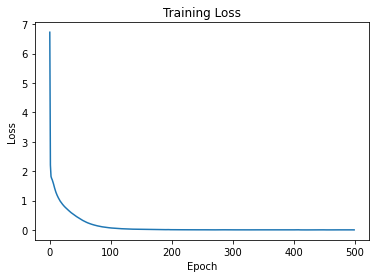

In [319]:
start_point = 0
plt.plot(range(start_point,epoch_number), torch.stack(loss_trajectory).detach().numpy()[start_point:])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Model Clustering Analysis

In [320]:
hidden_unit_activations = my_net.input_weights.forward(data_array_torch).detach().numpy()

In [321]:
affinity_clustering.labels_

array([6, 3, 0, 4, 5, 5, 6, 5, 0, 5, 4, 4, 3, 2, 3, 6, 1, 0, 2, 1, 6, 3,
       6, 0, 1, 4, 4, 2, 4, 4, 6, 3, 5, 4, 3, 0, 6, 6, 6, 6, 3, 6, 3, 4,
       3, 5, 0, 4, 6, 0])

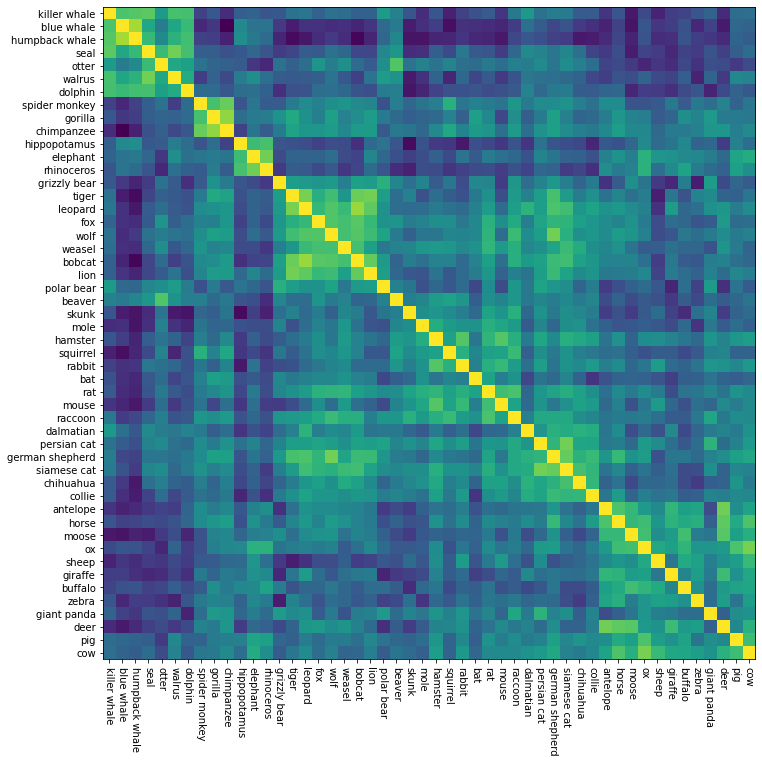

In [322]:

model_similarity_matrix = visualize_similarity_matrix(affinity_clustering.labels_,
                                                      hidden_unit_activations,
                                                      animal_names)

In [323]:
# cosine_similarity(data_similarity_matrix, model_similarity_matrix)
# data_similarity_matrix - model_similarity_matrix
# np.linalg.norm((data_similarity_matrix - np.random.rand(50,50)))
np.corrcoef(data_similarity_matrix.flatten(), model_similarity_matrix.flatten())

array([[1.        , 0.93071818],
       [0.93071818, 1.        ]])

### Compute Model Representation and Cluster

In [324]:
hidden_unit_activations = my_net.input_weights.forward(data_array_torch).detach().numpy()

# hidden_unit_activations
model_clustering = AffinityPropagation(random_state=1).fit(hidden_unit_activations)
model_clustering.labels_

array([6, 7, 3, 4, 1, 1, 6, 1, 0, 1, 8, 4, 7, 5, 7, 6, 2, 0, 5, 2, 9, 7,
       9, 3, 2, 4, 8, 5, 4, 2, 6, 7, 1, 8, 1, 3, 9, 9, 8, 6, 7, 9, 7, 4,
       8, 1, 3, 8, 9, 3])

### TSNE for model representation

In [325]:
tsne_model = manifold.TSNE(n_components=2,
                    perplexity=7.5,
                    early_exaggeration=12,
                    random_state=1).fit_transform(hidden_unit_activations)

Text(0.5, 1.0, 'T-SNE visualization of model representation')

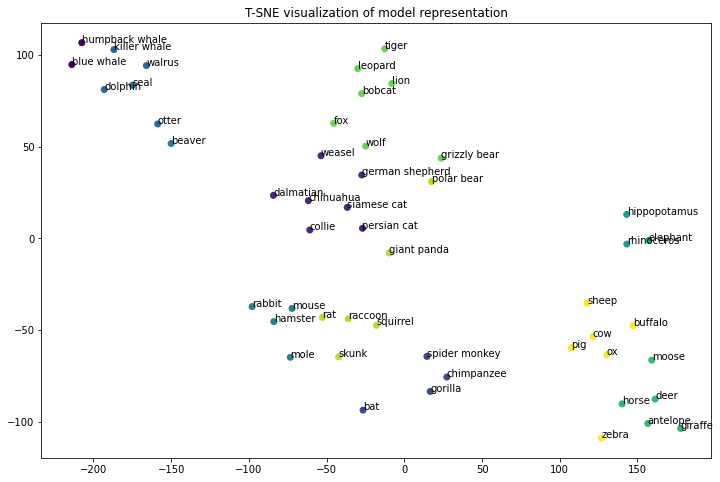

In [326]:
x = tsne_model[:,0]
y = tsne_model[:,1]

fig, ax = plt.subplots()
ax.scatter(x,y,c=model_clustering.labels_)

fig.set_size_inches(12, 8)

for i, animal in enumerate(animal_names):
    x_coor = x[i]
    y_coor = y[i]
    ax.annotate(animal, (x_coor, y_coor))
    
plt.title("T-SNE visualization of model representation")

Directions to do:
RSA of the data and the model values
3d visualization of dimensionality reduction
Numbers for clusters

# Random Walks in Memory

In [517]:
hidden_unit_activations

array([[ 0.34971625, -1.71602671,  0.8675696 , ...,  1.46401492,
         0.36329665,  1.01262289],
       [ 1.47015109,  3.31482523, -1.22794571, ...,  2.41173898,
         0.75347259,  1.17362381],
       [ 1.62658417, -0.36170732,  1.79474258, ...,  1.84613233,
        -1.19525873, -1.10937457],
       ...,
       [ 1.18230135,  0.69334994,  1.40988531, ..., -0.11928917,
         1.4635985 , -0.65206027],
       [ 1.04268939, -1.64608075, -1.42145842, ...,  1.38872238,
         0.86659432,  0.52752449],
       [ 1.99278698, -1.29769809,  1.93636124, ...,  1.95329436,
        -2.07709283, -0.95585482]])

### Compute Similarity

In [518]:
similarity_matrix = compute_similarity_matrix(hidden_unit_activations)
        
np.round(similarity_matrix, decimals=3)

array([[1.   , 0.419, 0.424, ..., 0.581, 0.715, 0.542],
       [0.419, 1.   , 0.509, ..., 0.679, 0.517, 0.416],
       [0.424, 0.509, 1.   , ..., 0.595, 0.568, 0.8  ],
       ...,
       [0.581, 0.679, 0.595, ..., 1.   , 0.64 , 0.51 ],
       [0.715, 0.517, 0.568, ..., 0.64 , 1.   , 0.507],
       [0.542, 0.416, 0.8  , ..., 0.51 , 0.507, 1.   ]])

### Convert to probabilities

In [519]:
num_animals = 50
beta = 30

similarity_matrix[np.arange(num_animals), np.arange(num_animals)] = 0

similarity_matrix = similarity_matrix**beta

row_norms = np.sum(similarity_matrix, axis=1)
markov_chain = np.einsum("ij,i -> ij", similarity_matrix, 1/row_norms)

# np.sum(markov_chain, axis=1)
markov_chain

array([[0.00000000e+00, 4.24573622e-10, 6.08191631e-10, ...,
        7.57262407e-06, 3.73744129e-03, 9.11588496e-07],
       [1.34225504e-08, 0.00000000e+00, 4.39127151e-06, ...,
        2.57146556e-02, 7.34623018e-06, 1.03524757e-08],
       [6.40479219e-10, 1.46275927e-07, 0.00000000e+00, ...,
        1.63863127e-05, 3.96020229e-06, 1.14130934e-01],
       ...,
       [2.15536813e-05, 2.31512122e-03, 4.42885737e-05, ...,
        0.00000000e+00, 3.95894742e-04, 4.18208584e-07],
       [2.73041590e-03, 1.69760608e-07, 2.74730700e-06, ...,
        1.01615299e-04, 0.00000000e+00, 9.31850684e-08],
       [2.50278510e-06, 8.99056342e-10, 2.97552425e-01, ...,
        4.03406237e-07, 3.50200393e-07, 0.00000000e+00]])

In [520]:
def run_chain(chain, n, start=None, seed=1):
    np.random.seed(seed)
    run = []
    if start == None:
        state = np.random.choice(np.arange(chain.shape[0]))
    else:
        state = start
    run.append(state)
    while len(run) < n:
        conditional_dist = chain[state,:]
        new_state = np.random.choice(a=np.arange(chain.shape[0]), p=conditional_dist)
        state = new_state
        run.append(state)
        
    return run

In [521]:
markov_run = run_chain(markov_chain, 300, seed=1)
markov_run

[37,
 48,
 38,
 5,
 48,
 20,
 48,
 20,
 48,
 39,
 15,
 30,
 39,
 0,
 39,
 6,
 48,
 20,
 48,
 39,
 15,
 39,
 15,
 6,
 39,
 15,
 39,
 15,
 20,
 15,
 39,
 6,
 39,
 0,
 30,
 6,
 0,
 39,
 0,
 6,
 39,
 6,
 20,
 48,
 20,
 15,
 39,
 0,
 39,
 0,
 39,
 0,
 39,
 15,
 20,
 48,
 20,
 48,
 41,
 20,
 41,
 20,
 48,
 20,
 48,
 20,
 6,
 0,
 39,
 0,
 39,
 6,
 39,
 15,
 36,
 15,
 39,
 0,
 39,
 6,
 0,
 39,
 6,
 30,
 39,
 0,
 39,
 15,
 0,
 39,
 0,
 39,
 0,
 39,
 30,
 6,
 39,
 15,
 20,
 48,
 20,
 48,
 6,
 39,
 0,
 39,
 0,
 39,
 15,
 39,
 0,
 39,
 6,
 7,
 31,
 7,
 31,
 7,
 9,
 7,
 9,
 5,
 9,
 7,
 9,
 5,
 9,
 40,
 14,
 12,
 14,
 40,
 14,
 40,
 21,
 31,
 21,
 40,
 14,
 40,
 14,
 40,
 14,
 12,
 42,
 40,
 14,
 40,
 12,
 40,
 12,
 14,
 40,
 14,
 12,
 14,
 12,
 42,
 12,
 14,
 40,
 14,
 12,
 42,
 40,
 14,
 40,
 12,
 42,
 33,
 42,
 14,
 12,
 14,
 40,
 14,
 40,
 14,
 12,
 42,
 12,
 14,
 12,
 14,
 40,
 12,
 14,
 42,
 14,
 40,
 14,
 40,
 14,
 40,
 14,
 12,
 40,
 14,
 40,
 14,
 40,
 42,
 12,
 7,
 40,
 14,
 12,
 7,
 21,
 

In [522]:
markov_x = tsne_model[markov_run,0]
markov_y = tsne_model[markov_run,1]

Text(0.5, 1.0, 'T-SNE visualization of model representation')

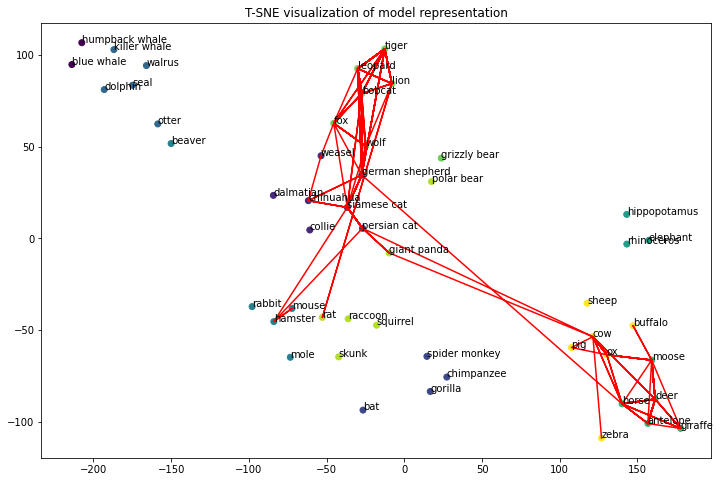

In [523]:
x = tsne_model[:,0]
y = tsne_model[:,1]

fig, ax = plt.subplots()
ax.scatter(x,y,c=model_clustering.labels_)
ax.plot(markov_x, markov_y, c="red")

fig.set_size_inches(12, 8)

for i, animal in enumerate(animal_names):
    x_coor = x[i]
    y_coor = y[i]
    ax.annotate(animal, (x_coor, y_coor))
    
plt.title("T-SNE visualization of model representation")

### Graph distance between transitions

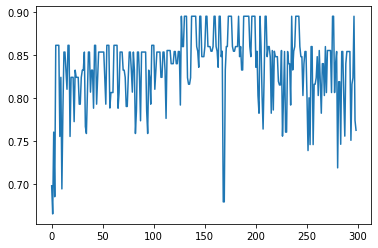

In [526]:
points_in_walk = hidden_unit_activations[markov_run, :]

num_steps = points_in_walk.shape[0]

distances = []

for i in range(num_steps - 1):
    point_from = points_in_walk[i,:]
    point_to = points_in_walk[i+1,:]
    similarity = cos_sim(point_to, point_from)
    distances.append(similarity)
#     distance = np.linalg.norm(point_to - point_from)
#     distances.append(distance)
    
plt.plot(distances)

To do with random walks:

Show the order of the walk
Show the distance between steps of the walk over time (could average over many walks)
When are the clusters exhausted?